In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from utils.dataloader import Dataloader

dataloader = Dataloader(data_dir="data/")

data = dataloader.load_all()
comprehensive_data = data["comprehensive_data"]
covid19_testing_record = data["covid19_testing_record"]
covid19_variants_found = data["covid19_variants_found"]
vaccinations_by_country = data["vaccinations_by_country"]
vaccination_by_manufacturer = data["vaccination_by_manufacturer"]

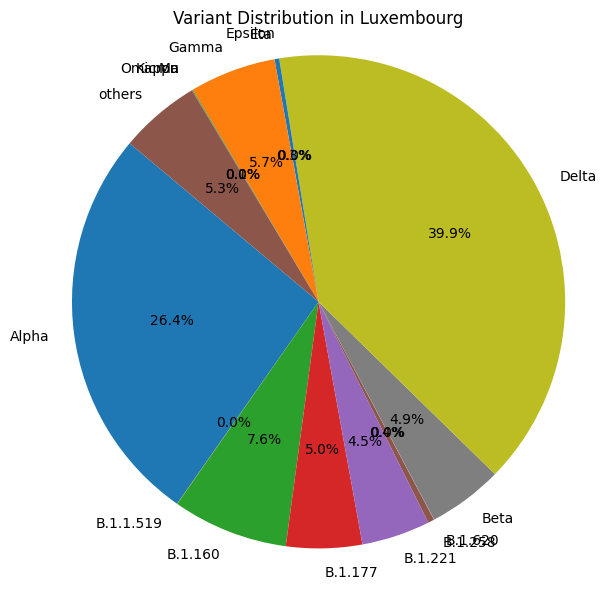

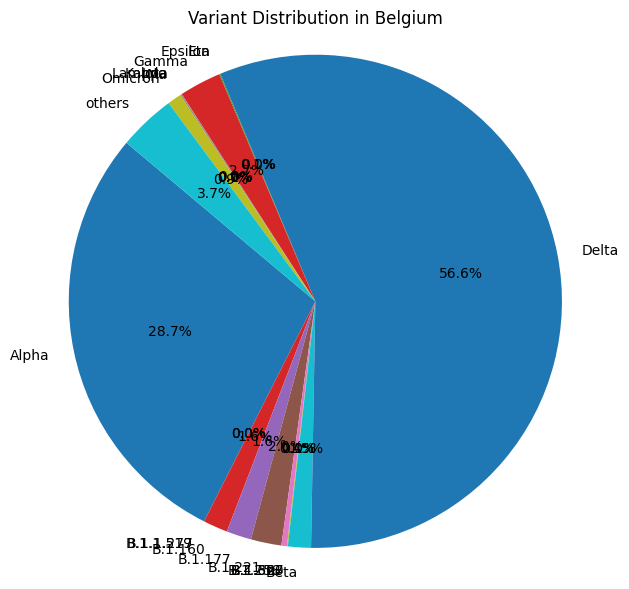

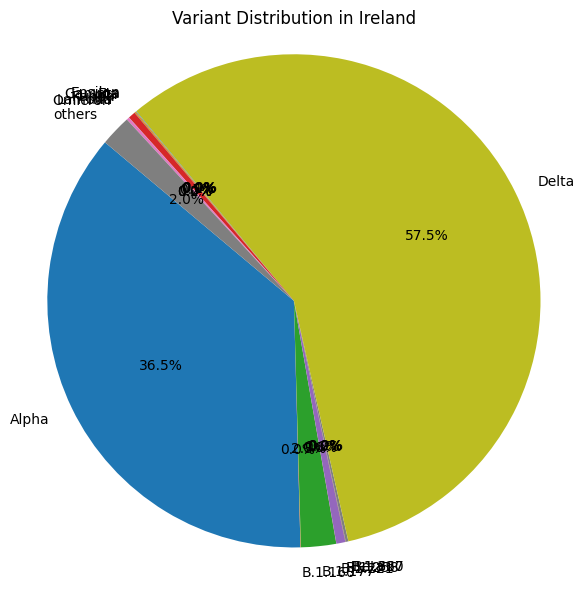

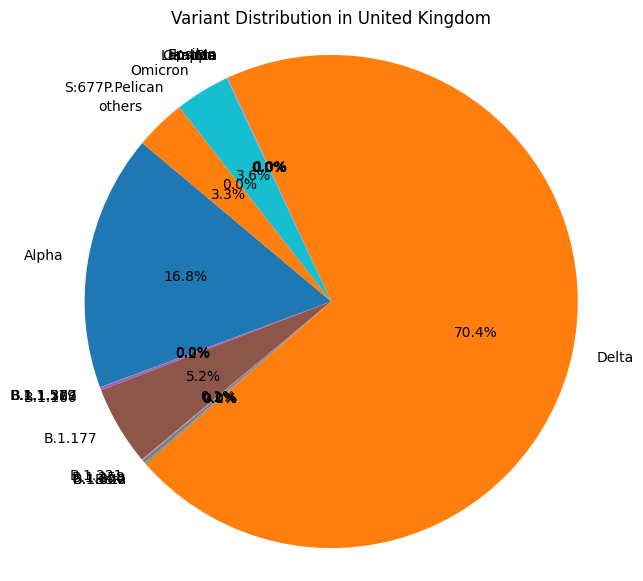

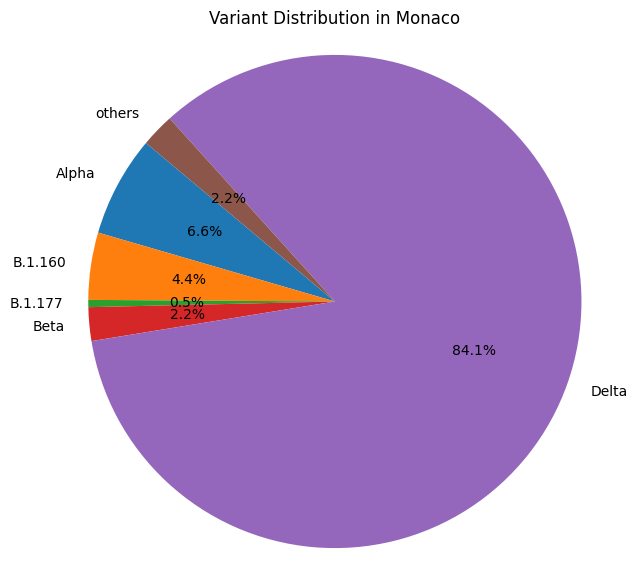

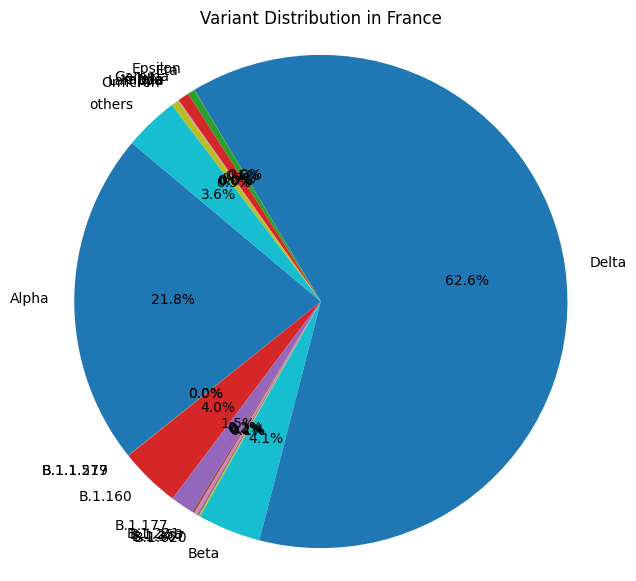

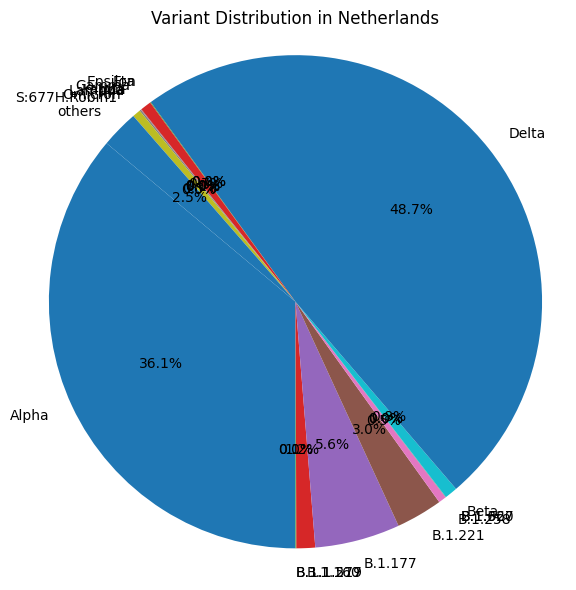

In [3]:
countries = dataloader.western_europe_countries

for country in countries:
    df_country = covid19_variants_found[covid19_variants_found['country'] == country]
    variant_counts = df_country.groupby('variant')['number_of_sequences'].sum()
    variant_counts = variant_counts[(variant_counts > 0) & (variant_counts.index != 'non_who')]  # Remove variants with 0 sequences and non_who
    plt.figure(figsize=(7, 7))
    plt.pie(variant_counts, labels=variant_counts.index, autopct='%1.1f%%', startangle=140)
    plt.title(f'Variant Distribution in {country}')
    plt.axis('equal')
    plt.show()

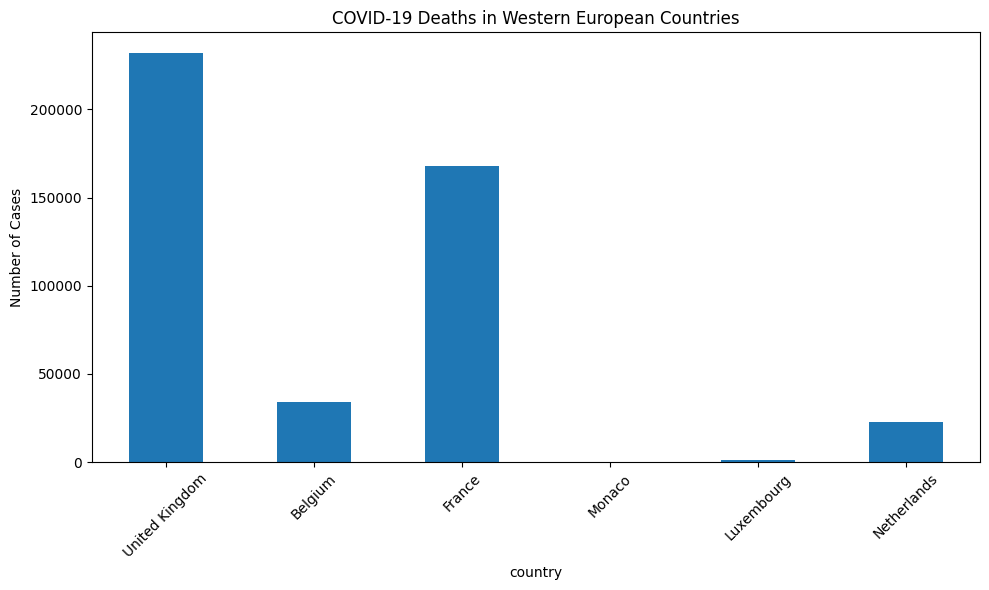

In [4]:
fig, ax = plt.subplots(figsize=(10, 6))
subset = comprehensive_data[comprehensive_data['country'].isin(countries)]
subset = subset.set_index('country')

subset['deaths_cases'].plot(kind='bar', ax=ax)
ax.set_ylabel('Number of Cases')
ax.set_title('COVID-19 Deaths in Western European Countries')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [5]:
# Calculate death to recovery ratio for each of the 7 countries
death_recovery = comprehensive_data[['country', 'deaths_cases', 'recovered_cases']].copy()
death_recovery['death_to_recovery_ratio'] = death_recovery['deaths_cases'] / death_recovery['recovered_cases']
death_recovery['death_to_recovery_ratio_per_thousand'] = death_recovery['death_to_recovery_ratio'] * 1000 #deaths per thousand recoveries
death_recovery[death_recovery['country'].isin(countries)]

,country,deaths_cases,recovered_cases,death_to_recovery_ratio,death_to_recovery_ratio_per_thousand
19,United Kingdom,232112.0,24692874.0,0.009400,9.399959
26,Belgium,34339.0,4827378.0,0.007113,7.113385
38,France,168091.0,38829399.0,0.004329,4.328962
64,Monaco,67.0,17114.0,0.003915,3.914923
83,Luxembourg,1000.0,390378.0,0.002562,2.561620
92,Netherlands,22986.0,8613215.0,0.002669,2.668690


---For report ???---
    We can use the total number of sequence for each coutry to assume as its prevalence. We can either say it is the most spreaded variants or maybe the variant that last the longest. 

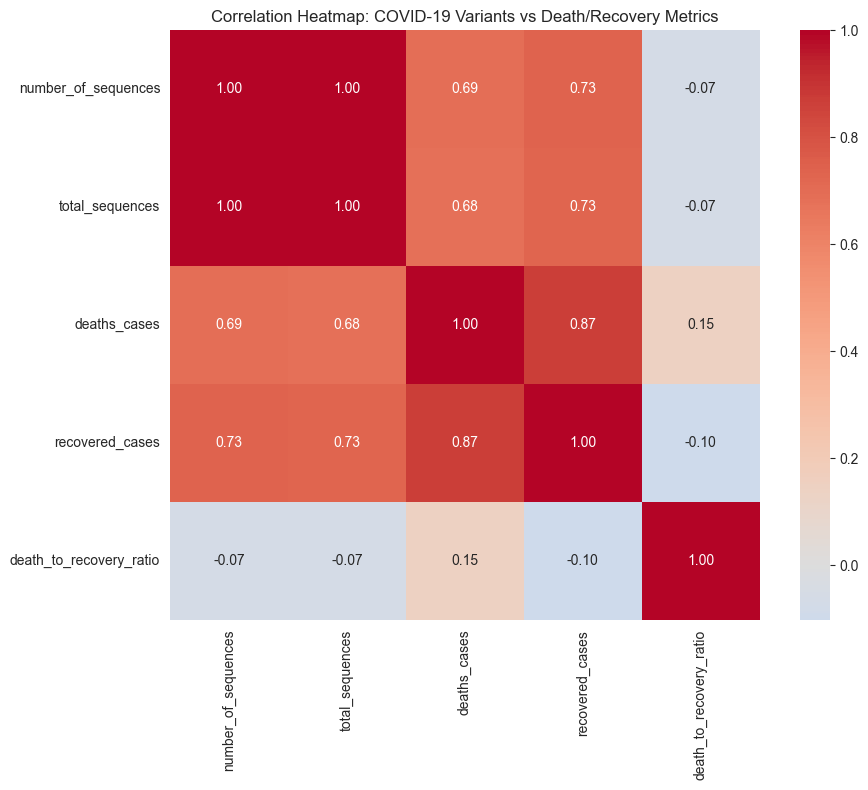

In [11]:
# Create a summary dataframe for variants by country
variant_summary = covid19_variants_found.groupby('country').agg({
    'number_of_sequences': 'sum',
    'total_sequences': 'mean'
}).reset_index()

# Merge with death_recovery data
merged_df = pd.merge(variant_summary, death_recovery, on='country', how='inner')

# Select numerical columns for correlation
correlation_columns = ['number_of_sequences', 'total_sequences', 'deaths_cases', 
                      'recovered_cases', 'death_to_recovery_ratio']
correlation_data = merged_df[correlation_columns]

# Calculate correlation matrix
correlation_matrix = correlation_data.corr()

# Create heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, fmt='.2f')
plt.title('Correlation Heatmap: COVID-19 Variants vs Death/Recovery Metrics')
plt.tight_layout()
plt.show()

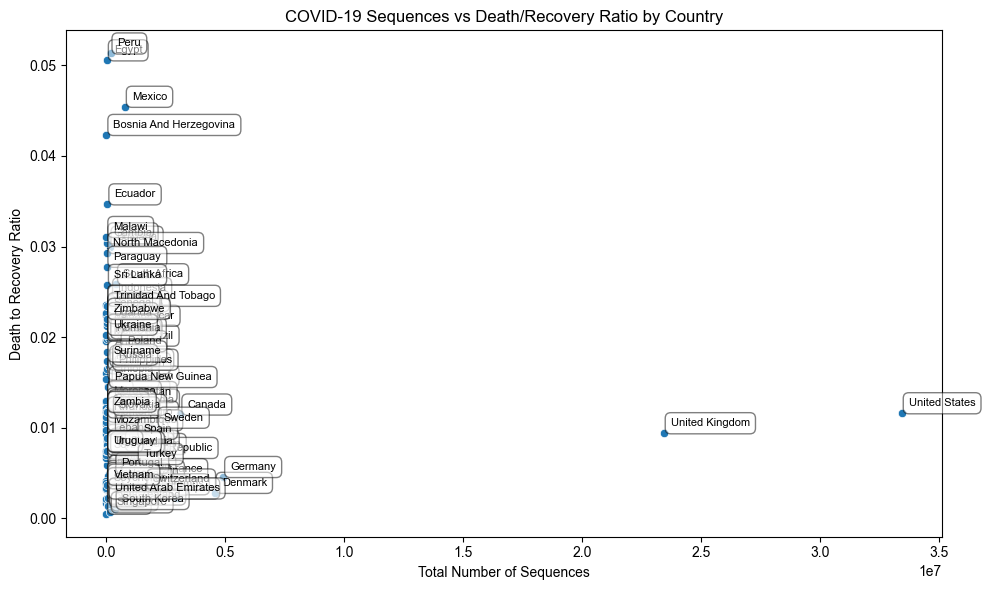

In [6]:
# Get total sequences for each country
total_sequences_by_country = {}
for country in covid19_variants_found['country'].unique():
    df_country = covid19_variants_found[covid19_variants_found['country'] == country]
    total_sequences = df_country['number_of_sequences'].sum()
    total_sequences_by_country[country] = total_sequences

# Create lists for plotting
x_values = []
y_values = []
labels = []

for country in covid19_variants_found['country'].unique():
    if country in total_sequences_by_country and country in death_recovery['country'].values:
        x_values.append(total_sequences_by_country[country])
        country_data = death_recovery[death_recovery['country'] == country]
        if not country_data.empty:
            y_values.append(country_data['death_to_recovery_ratio'].iloc[0])
            labels.append(country)


# Create the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=x_values, y=y_values)

# Add labels for each point with better styling
for i, label in enumerate(labels):
    plt.annotate(label,
                 (x_values[i], y_values[i]),
                 xytext=(5, 5),
                 textcoords='offset points',
                 bbox=dict(boxstyle='round,pad=0.5', fc='white', alpha=0.5),
                 fontsize=8)

plt.xlabel('Total Number of Sequences')
plt.ylabel('Death to Recovery Ratio')
plt.title('COVID-19 Sequences vs Death/Recovery Ratio by Country')

# Add grid and style
sns.set_style("whitegrid")
plt.tight_layout()
plt.show()

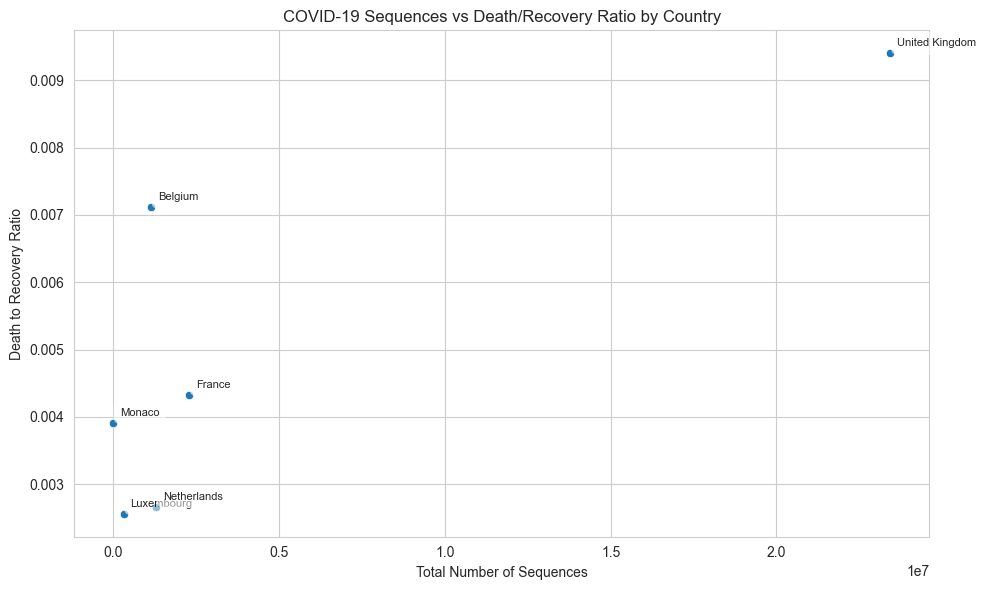

In [7]:
# Get total sequences for each country
total_sequences_by_country = {}
for country in countries:
    df_country = covid19_variants_found[covid19_variants_found['country'] == country]
    total_sequences = df_country['number_of_sequences'].sum()
    total_sequences_by_country[country] = total_sequences

# Create lists for plotting
x_values = []
y_values = []
labels = []

for country in countries:
    if country in total_sequences_by_country and country in death_recovery['country'].values:
        x_values.append(total_sequences_by_country[country])
        country_data = death_recovery[death_recovery['country'] == country]
        if not country_data.empty:
            y_values.append(country_data['death_to_recovery_ratio'].iloc[0])
            labels.append(country)


# Create the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=x_values, y=y_values)

# Add labels for each point with better styling
for i, label in enumerate(labels):
    plt.annotate(label,
                 (x_values[i], y_values[i]),
                 xytext=(5, 5),
                 textcoords='offset points',
                 bbox=dict(boxstyle='round,pad=0.5', fc='white', alpha=0.5),
                 fontsize=8)

plt.xlabel('Total Number of Sequences')
plt.ylabel('Death to Recovery Ratio')
plt.title('COVID-19 Sequences vs Death/Recovery Ratio by Country')

# Add grid and style
sns.set_style("whitegrid")
plt.tight_layout()
plt.show()

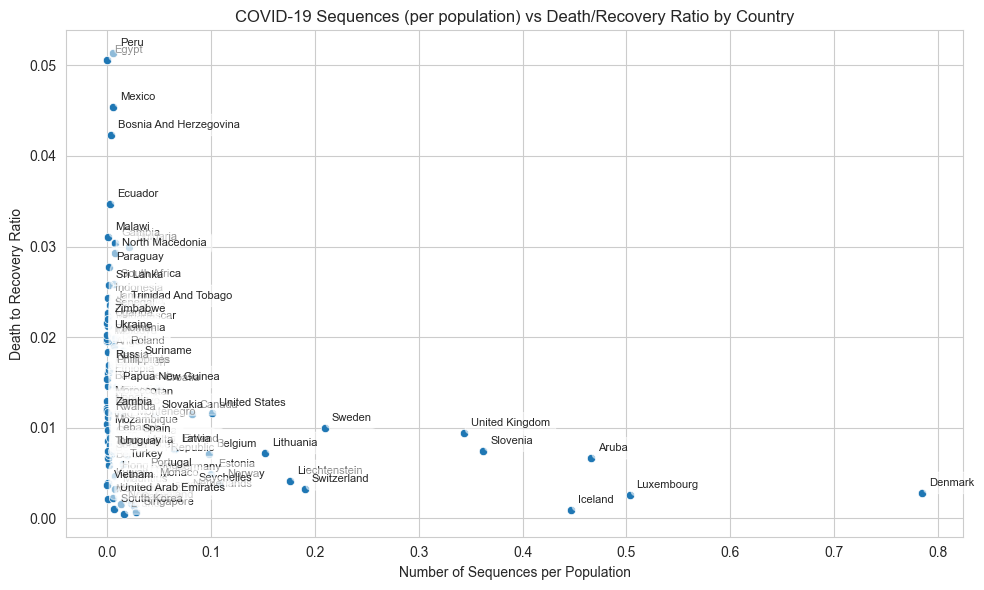

In [8]:
# Get total sequences and population data for each country
sequences_per_population = {}
for country in covid19_variants_found['country'].unique():
    df_country = covid19_variants_found[covid19_variants_found['country'] == country]
    total_sequences = df_country['number_of_sequences'].sum()

    # Get population estimate from vaccination data
    country_vax = vaccinations_by_country[vaccinations_by_country['country'] == country]
    if not country_vax.empty:
        # Calculate population = people_vaccinated / (people_vaccinated_per_hundred / 100)
        people_vaccinated = country_vax['people_vaccinated'].max()
        people_vaccinated_per_hundred = country_vax['people_vaccinated_per_hundred'].max(
        )
        if people_vaccinated_per_hundred > 0:
            population = people_vaccinated / \
                (people_vaccinated_per_hundred / 100)
            sequences_per_population[country] = total_sequences / population

# Create lists for plotting
x_values = []
y_values = []
labels = []

for country in covid19_variants_found['country'].unique():
    if country in sequences_per_population and country in death_recovery['country'].values:
        x_values.append(sequences_per_population[country])
        country_data = death_recovery[death_recovery['country'] == country]
        if not country_data.empty:
            y_values.append(country_data['death_to_recovery_ratio'].iloc[0])
            labels.append(country)

# Create the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=x_values, y=y_values)

# Add labels for each point
for i, label in enumerate(labels):
    plt.annotate(label,
                 (x_values[i], y_values[i]),
                 xytext=(5, 5),
                 textcoords='offset points',
                 bbox=dict(boxstyle='round,pad=0.5', fc='white', alpha=0.5),
                 fontsize=8)

plt.xlabel('Number of Sequences per Population')
plt.ylabel('Death to Recovery Ratio')
plt.title('COVID-19 Sequences (per population) vs Death/Recovery Ratio by Country')

sns.set_style("whitegrid")
plt.tight_layout()
plt.show()

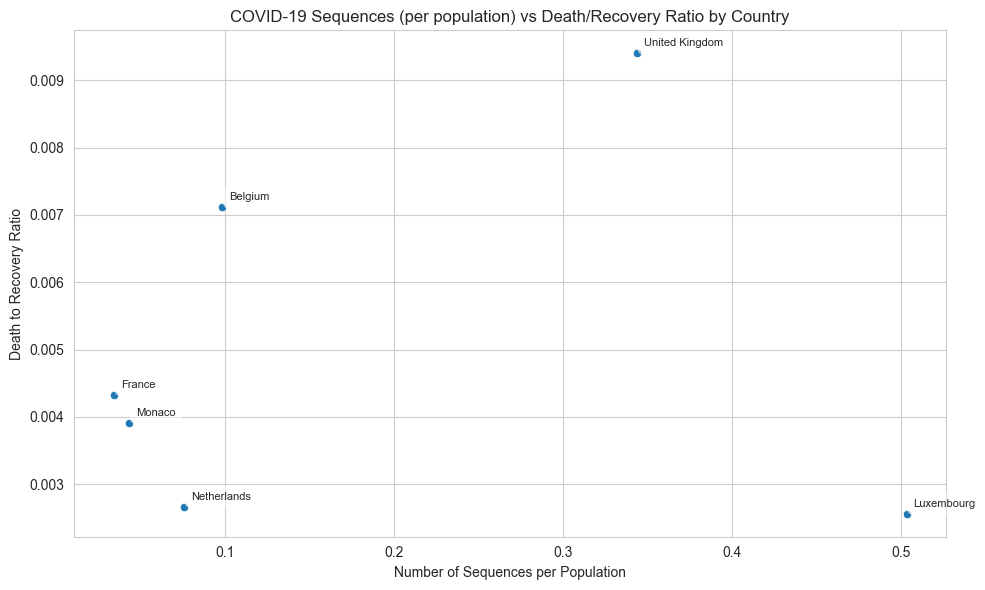

In [9]:
# Get total sequences and population data for each country
sequences_per_population = {}
for country in countries:
    df_country = covid19_variants_found[covid19_variants_found['country'] == country]
    total_sequences = df_country['number_of_sequences'].sum()

    # Get population estimate from vaccination data
    country_vax = vaccinations_by_country[vaccinations_by_country['country'] == country]
    if not country_vax.empty:
        # Calculate population = people_vaccinated / (people_vaccinated_per_hundred / 100)
        people_vaccinated = country_vax['people_vaccinated'].max()
        people_vaccinated_per_hundred = country_vax['people_vaccinated_per_hundred'].max(
        )
        if people_vaccinated_per_hundred > 0:
            population = people_vaccinated / \
                (people_vaccinated_per_hundred / 100)
            sequences_per_population[country] = total_sequences / population

# Create lists for plotting
x_values = []
y_values = []
labels = []

for country in countries:
    if country in sequences_per_population and country in death_recovery['country'].values:
        x_values.append(sequences_per_population[country])
        country_data = death_recovery[death_recovery['country'] == country]
        if not country_data.empty:
            y_values.append(country_data['death_to_recovery_ratio'].iloc[0])
            labels.append(country)

# Create the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=x_values, y=y_values)

# Add labels for each point
for i, label in enumerate(labels):
    plt.annotate(label,
                 (x_values[i], y_values[i]),
                 xytext=(5, 5),
                 textcoords='offset points',
                 bbox=dict(boxstyle='round,pad=0.5', fc='white', alpha=0.5),
                 fontsize=8)

plt.xlabel('Number of Sequences per Population')
plt.ylabel('Death to Recovery Ratio')
plt.title('COVID-19 Sequences (per population) vs Death/Recovery Ratio by Country')

sns.set_style("whitegrid")
plt.tight_layout()
plt.show()

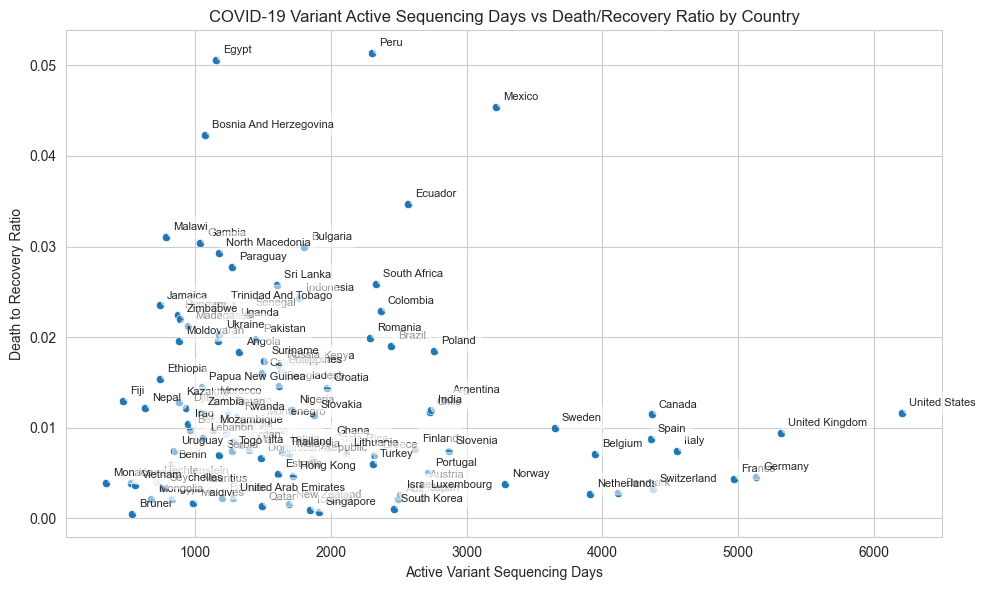

In [10]:
# Calculate the number of days with sequences >= 1 for each country
days_with_sequences = {}
for country in covid19_variants_found['country'].unique():
    df_country = covid19_variants_found[covid19_variants_found['country'] == country]
    # Group by date and sum sequences for each day
    daily_sequences = df_country.groupby(['date', 'variant'])[
        'number_of_sequences'].sum()
    # Count days with sequences >= 1
    days_with_seq = (daily_sequences >= 1).sum()
    days_with_sequences[country] = days_with_seq

# Create lists for plotting
x_values = []
y_values = []
labels = []

for country in covid19_variants_found['country'].unique():
    if country in days_with_sequences and country in death_recovery['country'].values:
        x_values.append(days_with_sequences[country])
        country_data = death_recovery[death_recovery['country'] == country]
        if not country_data.empty:
            y_values.append(country_data['death_to_recovery_ratio'].iloc[0])
            labels.append(country)

# Create the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=x_values, y=y_values)

# Add labels for each point
for i, label in enumerate(labels):
    plt.annotate(label,
                 (x_values[i], y_values[i]),
                 xytext=(5, 5),
                 textcoords='offset points',
                 bbox=dict(boxstyle='round,pad=0.5', fc='white', alpha=0.5),
                 fontsize=8)

plt.xlabel('Active Variant Sequencing Days')
plt.ylabel('Death to Recovery Ratio')
plt.title('COVID-19 Variant Active Sequencing Days vs Death/Recovery Ratio by Country')

sns.set_style("whitegrid")
plt.tight_layout()
plt.show()